# Import libraries

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

# Load data

In [22]:
x = pd.read_parquet('training_set_v7.parquet.gzip')
y = x['target']
del x['target']

IOError: Passed non-file path: training_set_v7.parquet.gzip

# Baseline Model

Accuracy of the GBM on training set: 0.955


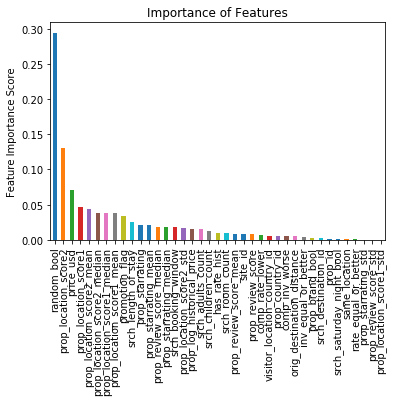

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(x,y)
predictors=list(x)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on training set: {:.3f}'.format(baseline.score(x, y)))
# pred=baseline.predict(X_test)
# print(classification_report(y_test, pred))

GBM Models:
There 2 types of parameters here:

Tree-specific parameters:
min_samples_split
min_samples_leaf
max_depth
min_leaf_nodes
max_features
loss function

Boosting specific paramters:
n_estimators
learning_rate
subsample

# Read in test data

In [12]:
x_test = pd.read_parquet('test_set_v7.parquet.gzip')
out = pd.DataFrame(x_test['srch_id'])
out['prop_id'] = x_test['prop_id']

del x_test['srch_id']
# del x_test['prop_id']

In [13]:
pred=baseline.predict_proba(x_test)

In [14]:
pred

array([[0.97094075, 0.00649091, 0.02256834],
       [0.95344494, 0.00774538, 0.03880967],
       [0.96346648, 0.0069423 , 0.02959122],
       ...,
       [0.94836539, 0.00829574, 0.04333886],
       [0.9514634 , 0.00851751, 0.04001909],
       [0.94867089, 0.00832503, 0.04300408]])

In [15]:
baseline.classes_

array([0, 1, 3])

In [16]:
df = pd.DataFrame(pred)
df.head()
df.columns = ['c1','c2','c3']
out['c1'] = df['c1']
out['c2'] = df['c2']
out['c3'] = df['c3']
out

,srch_id,prop_id,c1,c2,c3
0,1,3180,0.970941,0.006491,0.022568
1,1,5543,0.953445,0.007745,0.038810
2,1,14142,0.963466,0.006942,0.029591
3,1,22393,0.957561,0.008113,0.034326
4,1,24194,0.899189,0.013338,0.087473
5,1,28181,0.943696,0.009528,0.046776
6,1,34263,0.935107,0.009749,0.055143
7,1,37567,0.945786,0.009251,0.044964
8,1,50162,0.938870,0.008878,0.052252
9,1,54937,0.865228,0.012725,0.122047


In [17]:
outfile = out.sort_values(['srch_id','c3','c2','c1'], ascending=[True,False,False,True])

# Delete the class probability columns and double check the output

In [18]:
outfile_save = outfile
del outfile['c1']
del outfile['c2']
del outfile['c3']
outfile

,srch_id,prop_id
23,1,99484
12,1,61934
9,1,54937
13,1,63894
24,1,123675
21,1,94729
15,1,73666
4,1,24194
18,1,82231
16,1,74045


In [19]:
outfile.to_csv('outfile_7newGBM.csv', index=False)

# Tuning parameters

Tunign n_estimators and Learning rate

In [31]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x,y)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/opt/anaconda2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/opt/anaconda2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/opt/anaconda2/lib/python2.7/inspect.py", line 1051, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/opt/anaconda2/lib/python2.7/inspect.py", line 1011, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/opt/anaconda2/lib/python2.7/inspect.py", line 453, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "/opt/anaconda2/lib/python2.7/inspect.py", line

IndexError: string index out of range

max_depth

In [ ]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x,y)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

# First evaluation of new model on test set

In [ ]:
#UPDATE TEST PART
model1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(x,y)
predictors=list(x)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(x_test)
print(classification_report(y_test, pred))

# Other factors
Tree related parameters: Min sample split and min samples leaf

In [ ]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x,y)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

Max features

In [ ]:
#TUNING MAX FEATURES
p_test5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7, subsample=1, random_state=10), 
param_grid = p_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x,y)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

Subsample

In [ ]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , random_state=10), 
param_grid = p_test6, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x,y)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

# Evaluation of final model on Test set

In [ ]:
#UPDATE TEST PART
new=GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , subsample=0.95, random_state=10)
new.fit(x,y)
predictors=list(x)
feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(x_test)
print(classification_report(y_test, pred))

# Comparison of ROC AUC

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 


#run models
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(x,y)

model1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(x,y)

new=GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , subsample=0.95, random_state=10)
new.fit(x,y)

#calculate values for ROC AUC plot
#baseline model
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(x_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(x_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(x_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model 
new_roc_auc = roc_auc_score(y_test, new.predict(x_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()